In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import torch
from ddpm import get_dataset, viz_sample, viz_samples, NoiseScheduler, reconstruct, denoise

# learning data

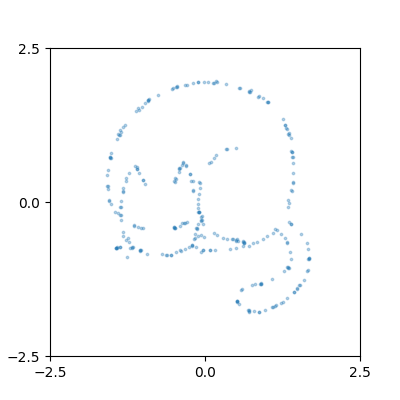

In [3]:
viz_sample(get_dataset(data_size=300).tensors[0])

# forwarding

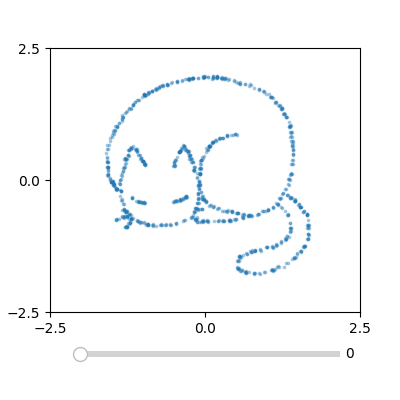

In [4]:
x_0 = get_dataset().tensors[0]  # original data
ns = NoiseScheduler()
samples = [x_0]
for t in range(ns.num_timesteps):
    noise = torch.randn(x_0.shape)
    samples.append(ns.add_noise(x_0, noise, t))
viz_samples(samples)  # you can control timestep via slider

# training

In [38]:
%%time
# !python ddpm/train.py  # DDPM
!python ddpm/train_fm.py  # CFM (with larger size)

100%|██████████████████████████| 1000/1000 [21:43<00:00,  1.30s/it, loss=2.8449]
saving model to /home/ymasuyama/projects-wsl/tiny-tiny-flow-matching/learning_results/2024-12-01_19-55-06
CPU times: user 31.9 s, sys: 11 s, total: 42.9 s
Wall time: 21min 45s


# denoising

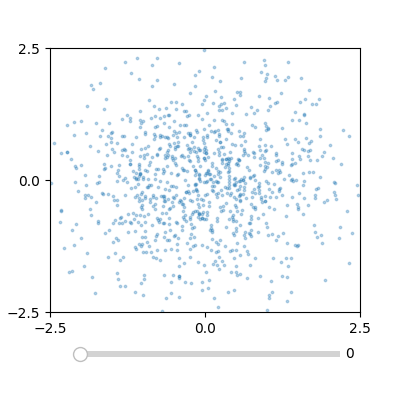

In [5]:
log_dir = "learning_results/2024-12-01_19-55-06"
eval_data_size = 1000
ns, model = reconstruct(log_dir)
model.eval()
x_last = torch.randn(eval_data_size, 2)
samples = [x_last]

# DDPM
# for t in reversed(range(ns.num_timesteps)):
#     with torch.no_grad():
#         residual = model(samples[-1], t)
#     samples.append(ns.remove_noise(samples[-1], residual, t))

# CFM
t_delta = 1 / ns.num_timesteps
for t in range(ns.num_timesteps):
    with torch.no_grad():
        u_pred = model(samples[-1], t * t_delta)
        samples.append(samples[-1] + u_pred * t_delta)

viz_samples(samples)

# other examples

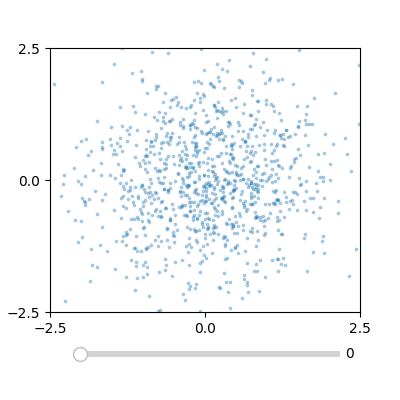

In [7]:
viz_samples(denoise("assets/learning_examples/dino"))

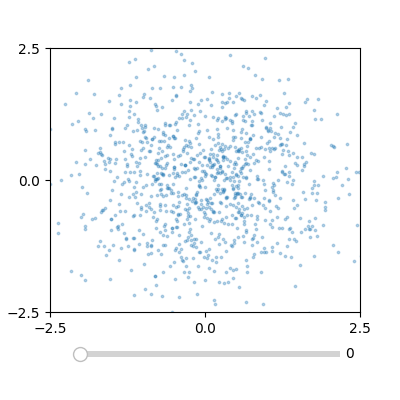

In [8]:
viz_samples(denoise("assets/learning_examples/sheep"))

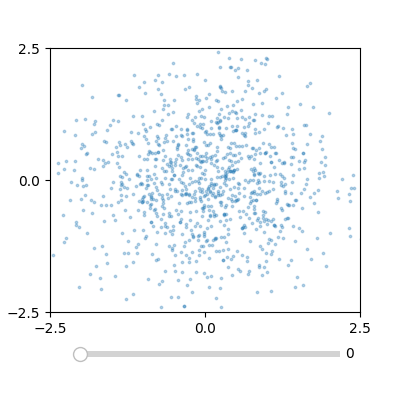

In [9]:
viz_samples(denoise("assets/learning_examples/panda"))